In [1]:
%matplotlib inline
%config Completer.use_jedi = False

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
train_data = pd.read_excel("../../data/unzipped/Train.xlsx", skiprows=range(1,2), index_col=0)

In [7]:
train_data.head()

,"Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения","Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения","Диффузный индекс заработной платы, ожидаемые изменения","Диффузный индекс занятости, ожидаемые изменения","Диффузный индекс выпуска, ожидаемые изменения","Диффузный индекс закупок оборудования, ожидаемые изменения","Диффузный индекс финансового состояния, ожидаемые изменения","Диффузный индекс портфеля заказов, ожидаемые изменения","Диффузный индекс задолженности банкам, ожидаемые изменения","Производство скота и птицы, тыс.тонн",...,"Среднемесячная пенсия, руб.",Реальная пенсия,MIACR,"Ставка по краткосрочным кредитам, население","Ставка по долгосрочным кредитам, население","Ставка по краткосрочным кредитам, фирмы","Ставка по долгосрочным кредитам, фирмы","Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Цена Urals, долл/бар"
2003m01,74,93,61,40,44,28,47,44,22,6.269096,...,7.288791,0.000000,6.331,21.5,18.9,14.5,17.3,6.993658,6.290272,3.383413
2003m02,78,95,66,37,49,30,53,56,18,6.320768,...,7.313953,0.008960,2.514,22.2,17.8,14.1,19.6,7.019476,6.298398,3.420624
2003m03,84,98,72,45,56,29,51,61,25,6.361302,...,7.314153,-0.001091,2.625,18.3,19.9,13.3,16.4,7.031299,6.325613,3.363693
2003m04,83,95,70,40,66,38,59,69,23,6.269096,...,7.382809,0.057178,1.888,20.0,21.3,13.4,14.9,7.048821,6.343001,3.130242
2003m05,79,94,76,43,66,33,63,68,23,6.177944,...,7.382809,0.049146,1.308,23.1,21.5,12.5,15.0,7.076400,6.371099,3.210488


In [10]:
train_data.values[:, 0]

array([74., 78., 84., 83., 79., 75., 74., 76., 74., 71., 77., 72., 80.,
       81., 85., 76., 73., 79., 74., 74., 69., 74., 73., 73., 79., 85.,
       81., 76., 73., 70., 67., 67., 69., 74., 70., 68., 77., 82., 79.,
       77., 69., 69., 67., 73., 73., 79., 74., 74., 80., 84., 85., 82.,
       73., 73., 75., 72., 78., 75., 79., 77., 82., 85., 89., 81., 81.,
       77., 74., 75., 74., 75., 72., 69., 67., 57., 57., 61., 58., 55.,
       53., 52., 53., 58., 55., 58., 64., 69., 67., 76., 64., 67., 65.,
       68., 66., 67., 66., 62., 75., 80., 84., 81., 71., 70., 67., 69.,
       71., 68., 67., 61., 67., 67., 74., 68., 63., 61., 64., 67., 66.,
       66., 63., 69., 70., 73., 75., 63., 68., 60., 57., 65., 64., 56.,
       55., 58., 64., 67., 69., 63., 58., 63., 63., 58., 63., 67., 63.,
       66., 81., 78., 85., 81., 74., 66., 60., 53., 60., 57., 65., 64.])

In [ ]:
class MetaModel:
    def __init__(self, window_size, normalizer, base_model, dynamic_model):
        self.window_size = window_size
        self.normalizer = normalizer
        self.base_model = base_model
        self.dynamic_model = dynamic_model
    def fit(self, X):
        assert len(X.shape) == 2
        X = self.normalizer(X)
        params = self.dynamic_model(X)
        self.base_model.fit(X, params)
    def predict(self, X):
        assert len(X.shape) == 1
        X = self.normalizer(X)
        params = self.base_model.predict(X)
        curve = self.dynamic_model.next_point(X, params)
        return self.

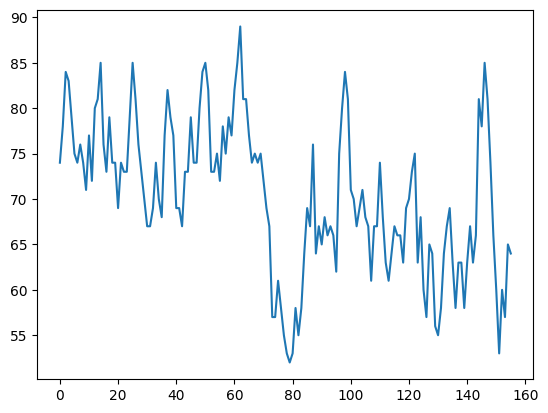

In [11]:
plt.plot(train_data.values[:, 0])

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [125]:
X = train_data.values[:, 0]

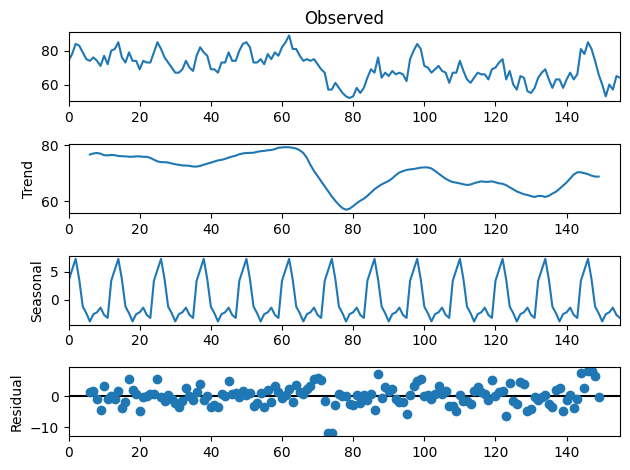

In [126]:
decompose_result = seasonal_decompose(X, model="additive", period=12)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [128]:
from sklearn.linear_model import LinearRegression

In [156]:
wo_seasons = X - seasonal
ids = np.arange(len(X)).reshape(-1,1)

In [157]:
trend_model = LinearRegression().fit(ids, wo_seasons)

In [158]:
trend_model.coef_, trend_model.intercept_

(array([-0.08832008]), 77.12044706775)

In [159]:
diff = wo_seasons - trend_model.predict(ids)

In [160]:
diff_norm = (diff - np.mean(diff)) / np.std(diff)

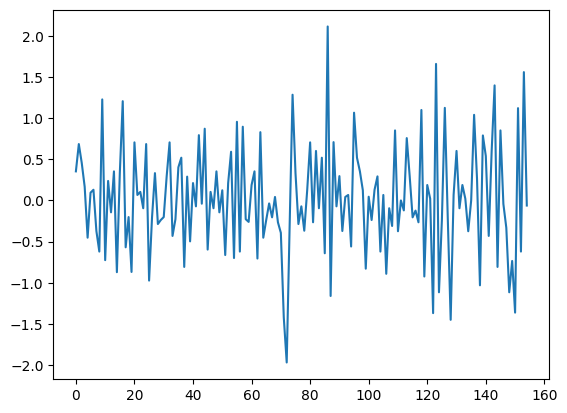

In [166]:
plt.plot(np.diff(diff_norm))

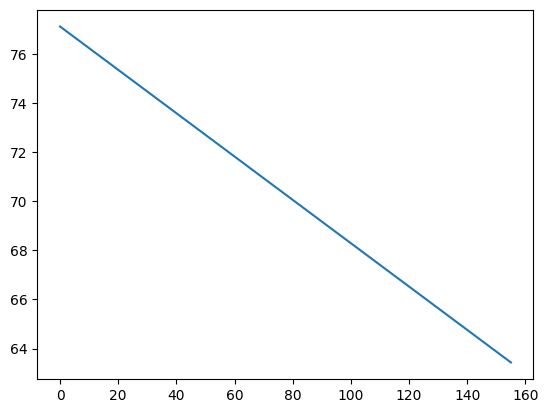

In [162]:
plt.plot(trend_model.predict(ids))

In [163]:
from statsmodels.tsa.stattools import adfuller

In [322]:
result = adfuller(diff_norm)

In [323]:
result

(-3.369446287684339,
 0.012045602952674067,
 1,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 274.0212710268156)

In [118]:
X = train_data.values[:, 18]
y = list(np.where(np.isnan(X))[0]) + [-1]
np.max(y)

23

In [751]:
window = 12 * 3

In [752]:
class Normalizer:
    def transform(self, X):
        last_nan = np.max(list(np.where(np.isnan(X))[0]) + [-1])
        X = X[last_nan + 1:]
        r = seasonal_decompose(X, model="additive", period=12)
        trend = X - r.seasonal
        mean = np.mean(trend)
        std = np.std(trend)
        trend_norm = (trend - mean) / std
        self.seasonal = r.seasonal
        self.mean = mean
        self.std = std
        return trend_norm
    def inverse(self, X):
        X *= self.std
        X += self.mean
        seasons = np.tile(self.seasonal, 2)[:len(X)]
        X += seasons
        return X

[0.42333411 0.27251122 0.28443979 0.34835312 0.35532873 0.35432823
 0.38485744 0.36158881 0.36458432 0.35957178 0.36853152 0.39419927
 0.4505796  0.30323901 0.34149772 0.38838131 0.3853768  0.3873748
 0.41790401 0.3956584  0.38358582 0.38558382 0.41319899 0.43398153
 0.48467464 0.36024456 0.37513318 0.39982579 0.4147144  0.39960076
 0.41842252 0.42241454 0.42441254 0.4194     0.44213949 0.44712703
 0.49114391 0.3835587  0.40336133 0.43389053 0.43887808 0.40944927
 0.42728918 0.43227673 0.4382588  0.44424087 0.4541912  0.4541912
 0.517166   0.39046835 0.39346385 0.43075964 0.41666072 0.38413752
 0.42046945 0.42246746 0.42146695 0.42943512 0.43740329 0.43540129
 0.49461315] [0.42333411 0.27251122 0.28443979 0.34835312 0.35532873 0.35432823
 0.38485744 0.36158881 0.36458432 0.35957178 0.36853152 0.39419927
 0.4505796  0.30323901 0.34149772 0.38838131 0.3853768  0.3873748
 0.41790401 0.3956584  0.38358582 0.38558382 0.41319899 0.43398153
 0.48467464 0.36024456 0.37513318 0.39982579 0.41471

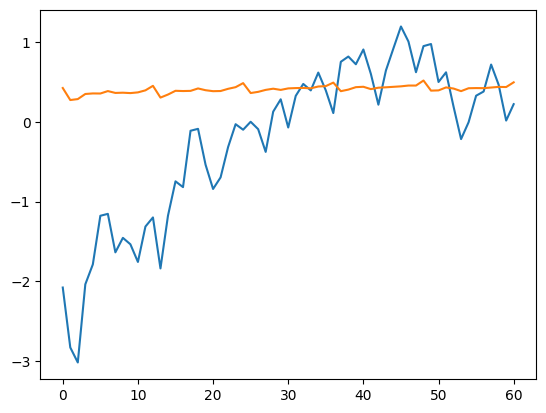

In [630]:
seq = train_data.values[:, 35]
normalizer = Normalizer()
subSeq = seq[-window - 1:]
origSubSeq = subSeq
subSeq = normalizer.transform(subSeq)
plt.plot(subSeq)
T0 = subSeq[0]
subSeq = np.diff(subSeq)
x = subSeq[-window-1:].reshape(1,-1)
#         y = base_model.predict(x)[0]
y = x[0][-1]
subSeq = [T0] + list(subSeq) + [y]
subSeq = np.cumsum(subSeq)
subSeq = normalizer.inverse(subSeq)
assert np.mean((subSeq[:-1] - origSubSeq) ** 2) < 1e-6, (subSeq, origSubSeq)
seq = np.append(seq, subSeq[-1])
plt.plot(origSubSeq)
print(origSubSeq, subSeq)

In [763]:
import tqdm

X_normed = []
for i in tqdm.tqdm(np.arange(train_data.shape[1]), position=0):
    X = train_data.values[:, i]
    X = Normalizer().transform(X)
    for j in range(len(X) - window - 2):
        sample = X[j:j+ window+2]
#         sample = np.diff(sample)
        X_normed.append(sample)

100%|█████████████████████████████████████████| 69/69 [00:00<00:00, 1177.70it/s]


In [764]:
from sklearn.neighbors import KNeighborsRegressor

In [765]:
base_model = KNeighborsRegressor()

In [766]:
base_model.fit([x[:-1] for x in X_normed], [x[-1] for x in X_normed])

KNeighborsRegressor()

In [767]:
from sklearn.manifold import TSNE

In [768]:
tsne = TSNE(verbose=1)

In [759]:
res = tsne.fit_transform([x[:-1] for x in X_normed])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8046 samples in 0.000s...
[t-SNE] Computed neighbors for 8046 samples in 1.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8046
[t-SNE] Computed conditional probabilities for sample 2000 / 8046
[t-SNE] Computed conditional probabilities for sample 3000 / 8046
[t-SNE] Computed conditional probabilities for sample 4000 / 8046
[t-SNE] Computed conditional probabilities for sample 5000 / 8046
[t-SNE] Computed conditional probabilities for sample 6000 / 8046
[t-SNE] Computed conditional probabilities for sample 7000 / 8046
[t-SNE] Computed conditional probabilities for sample 8000 / 8046
[t-SNE] Computed conditional probabilities for sample 8046 / 8046
[t-SNE] Mean sigma: 0.346334
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.613609
[t-SNE] KL divergence after 1000 iterations: 1.338279


In [760]:
X_normed[0].shape

(38,)

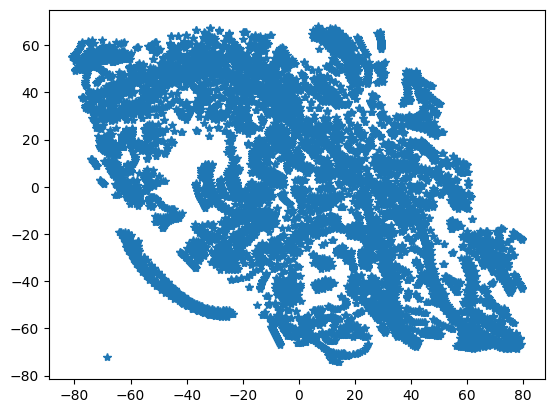

In [769]:
plt.plot(res[:, 0], res[:,1], '*')

In [782]:
def predict_for_seq(seq, steps):
    assert len(seq.shape) == 1, seq.shape[0] >= window + 1
    normalizer = Normalizer()
    seq = normalizer.transform(seq)
    for i in np.arange(steps):
        subSeq = seq[-window - 1:]
        origSubSeq = subSeq
        x = subSeq[-window-1:].reshape(1,-1)
        y = x[0][-1]
#         y = base_model.predict(x)[0]
        subSeq = list(subSeq) + [y]
        assert np.mean((subSeq[:-1] - origSubSeq) ** 2) < 1e-6, (subSeq, origSubSeq)
        seq = np.append(seq, subSeq[-1])
        plt.show()
    seq = normalizer.inverse(seq)
    return seq

0.07069719514144497


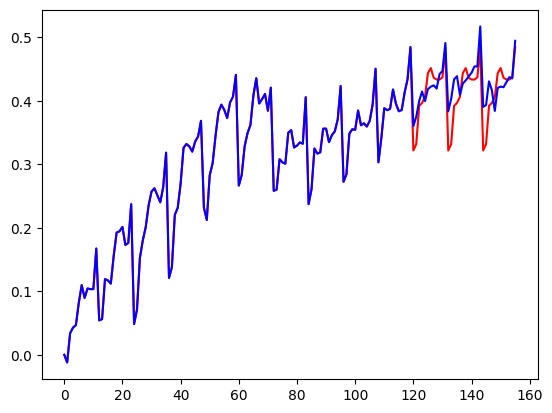

In [783]:
T = 35
offset = 36
orig = train_data.values[:, T]
window_data = orig[:-offset]
r = predict_for_seq(window_data, offset)
diff = np.mean((r[-offset:] - orig[-offset]) ** 2) ** 0.5
print(diff)
plt.plot(r, 'red')
plt.plot(train_data.values[:, T], 'blue')
plt.show()

In [772]:
train_data.values[:, T].shape, r.shape

((156,), (192,))

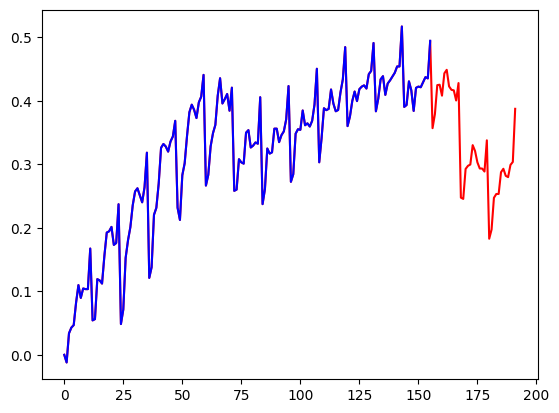

In [773]:
plt.plot(r, 'red')
plt.plot(train_data.values[:, T], 'blue')
plt.show()